## Exploration and Data Cleaning
- Tidy dataframe
- Check for missing values
- Check for duplicates
- Check datatypes
- Look at stats
- Look at correlations
- Make visualizations to understand possible Causes and Effects


In [83]:
from platform import python_version
print('Python Version', python_version())
!pip list

Python Version 3.8.8
Package                            Version
---------------------------------- -------------------
absl-py                            0.13.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astor                              0.8.1
astroid                            2.5
astropy                            4.2.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-g

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('Solarize_Light2')

In [3]:
df = pd.read_csv('pump_sensor.csv')

In [4]:
df.shape

(220320, 55)

In [5]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22',
       'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27',
       'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32',
       'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37',
       'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42',
       'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47',
       'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')

In [6]:
# Drop Unnamed Columns
df = df.drop(['Unnamed: 0'], axis=1)

In [7]:
df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [8]:
# Stats of sensors
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sensor_00,210112.0,2.372221,0.412227,0.000000,2.438831,2.456539,2.499826,2.549016
sensor_01,219951.0,47.591611,3.296666,0.000000,46.310760,48.133678,49.479160,56.727430
sensor_02,220301.0,50.867392,3.666820,33.159720,50.390620,51.649300,52.777770,56.032990
sensor_03,220301.0,43.752481,2.418887,31.640620,42.838539,44.227428,45.312500,48.220490
sensor_04,220301.0,590.673936,144.023912,2.798032,626.620400,632.638916,637.615723,800.000000
sensor_05,220301.0,73.396414,17.298247,0.000000,69.976260,75.576790,80.912150,99.999880
sensor_06,215522.0,13.501537,2.163736,0.014468,13.346350,13.642940,14.539930,22.251160
sensor_07,214869.0,15.843152,2.201155,0.000000,15.907120,16.167530,16.427950,23.596640
sensor_08,215213.0,15.200721,2.037390,0.028935,15.183740,15.494790,15.697340,24.348960
sensor_09,215725.0,14.799210,2.091963,0.000000,15.053530,15.082470,15.118630,25.000000


In [9]:
# Timeframe of Data
df.timestamp.min(), df.timestamp.max()

('2018-04-01 00:00:00', '2018-08-31 23:59:00')

### Missing Values

In [10]:
missing = pd.DataFrame(df.isnull().sum()).rename(columns = {0: 'total'})
missing['percent'] = missing['total'] / len(df)*100
missing = missing.sort_values('percent', ascending = False)
missing

,total,percent
sensor_15,220320,100.000000
sensor_50,77017,34.956881
sensor_51,15383,6.982117
sensor_00,10208,4.633261
sensor_07,5451,2.474129
sensor_08,5107,2.317992
sensor_06,4798,2.177741
sensor_09,4595,2.085603
sensor_01,369,0.167484
sensor_30,261,0.118464


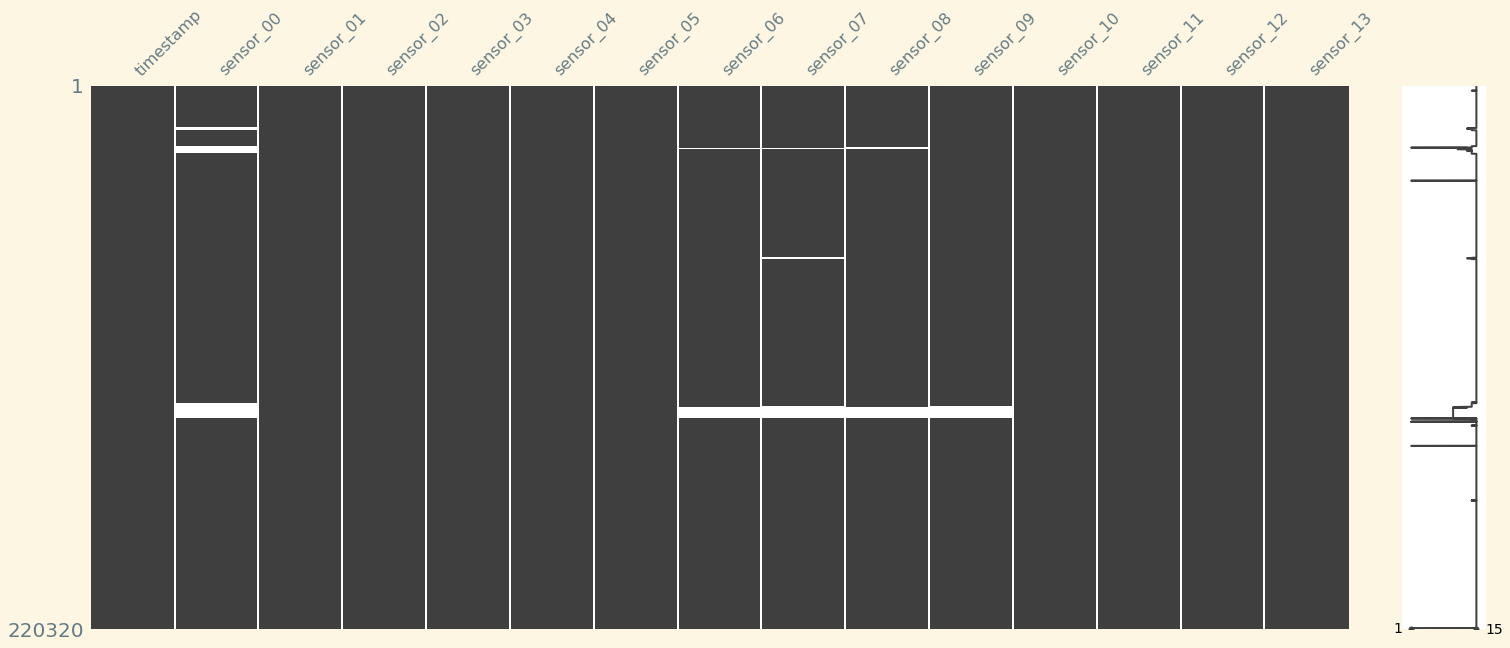

In [11]:
msno.matrix(df.iloc[:, 0:15]);

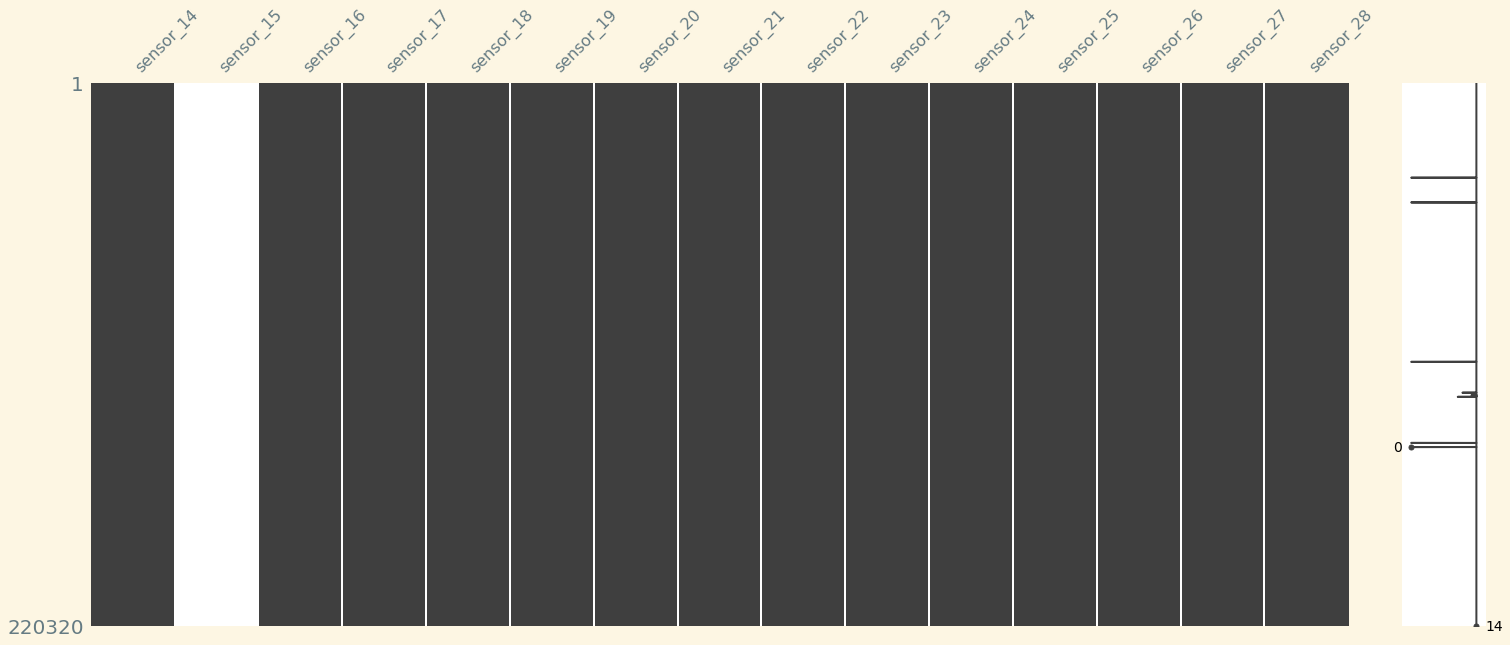

In [12]:
msno.matrix(df.iloc[:, 15:30]);

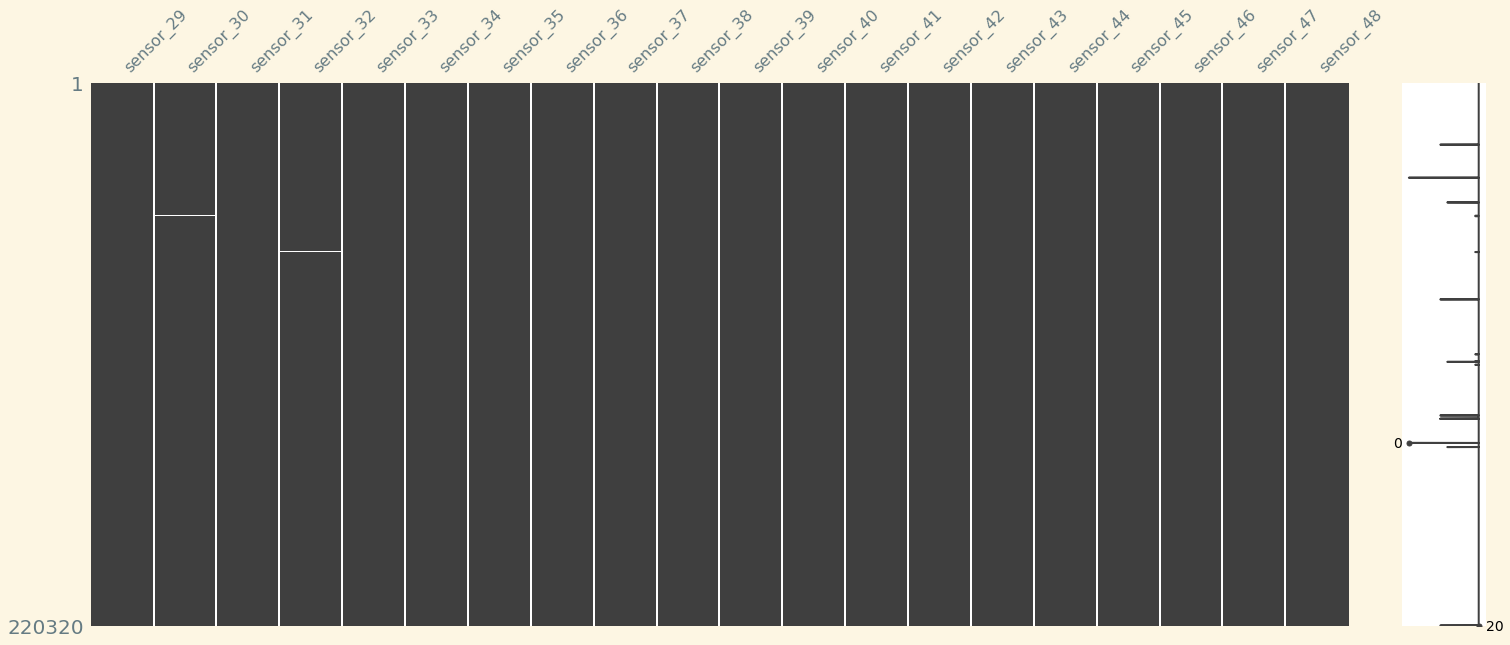

In [13]:
msno.matrix(df.iloc[:, 30:50]);

In [14]:
# Drop sensors with more than 30% missing values
df = df.drop(['sensor_50', 'sensor_15'], axis=1)

In [15]:
# impute with previous value
df = df.fillna(method='pad')

In [16]:
# Check if filling was successfull
df.isna().sum().sum()

0

## Data Types

In [17]:
# As the timestamp is currently of type 'object', it will be transformed to type 'datetime'
df.timestamp = pd.to_datetime(df.timestamp)

In [18]:
# Check if datetime working
df.loc[0,'timestamp'].day_name()

'Sunday'

In [19]:
df.timestamp.max()-df.timestamp.min()

Timedelta('152 days 23:59:00')

## Set Timestamp as Index

In [20]:
df = df.set_index(['timestamp'])

## Duplicates
At the beginning of every hour we have exactly the same values in all sensors as in the first minute. I guess this comes from how the measurements are interpolated over the minute. I will leave it for now. 

In [21]:
df.duplicated().sum()

2877

In [22]:
df.loc[df.duplicated(),:].index

DatetimeIndex(['2018-04-01 00:01:00', '2018-04-01 01:01:00',
               '2018-04-01 02:01:00', '2018-04-01 03:01:00',
               '2018-04-01 04:01:00', '2018-04-01 05:01:00',
               '2018-04-01 06:01:00', '2018-04-01 07:01:00',
               '2018-04-01 08:01:00', '2018-04-01 09:01:00',
               ...
               '2018-08-31 14:01:00', '2018-08-31 15:01:00',
               '2018-08-31 16:01:00', '2018-08-31 17:01:00',
               '2018-08-31 18:01:00', '2018-08-31 19:01:00',
               '2018-08-31 20:01:00', '2018-08-31 21:01:00',
               '2018-08-31 22:01:00', '2018-08-31 23:01:00'],
              dtype='datetime64[ns]', name='timestamp', length=2877, freq=None)

In [23]:
# Manually check duplicates
df.loc['2018-04-01 00:00:00':'2018-04-01 00:01:00']

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.31076,634.375,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.6412,65.68287,50.92593,38.19444,157.9861,67.70834,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.31076,634.375,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.6412,65.68287,50.92593,38.19444,157.9861,67.70834,201.3889,NORMAL


## Analysis of Machine Status

In [24]:
# What kinds of machine_status are there and how many of each?
df.machine_status.value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [25]:
# When does machine break down?
times = df[df.machine_status == 'BROKEN'].index
times

DatetimeIndex(['2018-04-12 21:55:00', '2018-04-18 00:30:00',
               '2018-05-19 03:18:00', '2018-05-25 00:30:00',
               '2018-06-28 22:00:00', '2018-07-08 00:11:00',
               '2018-07-25 14:00:00'],
              dtype='datetime64[ns]', name='timestamp', freq=None)

In [26]:
# show me what happens around pump failure
def failure(col):
    idx = df.index.get_loc(col)
    return(df.iloc[idx - 10 : idx + 10])

In [27]:
failure('2018-04-12 21:55:00')

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-12 21:45:00,2.389641,52.08333,53.038193,43.402775,393.634247,64.418690,13.418690,16.56539,15.733510,15.082470,...,36.718750,43.229160,62.50000,54.68750,46.00694,43.113430,295.7176,91.43519,194.1551,NORMAL
2018-04-12 21:46:00,2.278472,52.08333,53.038190,43.402775,154.146408,59.134530,13.353590,16.60880,15.661170,15.082470,...,36.718750,44.010410,62.78935,55.26620,45.42824,42.534720,296.8750,100.98380,187.7894,NORMAL
2018-04-12 21:47:00,2.282408,52.12674,52.994789,43.402775,133.313065,55.725560,13.230610,16.65220,15.697340,15.118630,...,36.718750,44.270830,62.78935,55.26620,45.42824,42.534720,311.3426,107.06020,190.1042,NORMAL
2018-04-12 21:48:00,1.858391,52.03993,52.951390,43.402775,131.924179,51.532050,13.252310,16.76071,15.776910,15.053530,...,36.718750,44.791660,62.21065,53.81944,46.29630,42.245370,330.1505,110.24310,206.8866,NORMAL
2018-04-12 21:49:00,1.834780,51.95312,52.951385,43.402775,133.544556,49.467130,13.317420,16.70284,15.530960,15.082470,...,36.718750,47.135410,60.76389,52.37268,47.45370,42.245369,343.4606,111.40050,226.2731,NORMAL
2018-04-12 21:50:00,1.533738,52.03993,52.951385,43.402775,110.975121,46.922940,13.172740,16.65220,15.661170,15.089700,...,36.718750,49.479160,59.02778,50.92593,48.32176,42.245369,352.7199,111.97920,244.7917,NORMAL
2018-04-12 21:51:00,1.349769,52.30035,52.951390,43.402770,110.512154,45.217250,13.201680,16.70284,15.892650,15.118630,...,36.718750,51.302080,56.71296,50.34722,49.76852,42.245370,361.4005,112.84720,259.5486,NORMAL
2018-04-12 21:52:00,1.290741,52.51736,52.907990,43.402775,112.595482,47.366530,13.498260,16.65220,15.653930,15.118630,...,36.718750,52.083330,54.97685,49.47917,51.21528,41.956020,371.5278,113.42590,276.3310,NORMAL
2018-04-12 21:53:00,1.220891,52.73437,52.821180,43.402775,113.174187,47.837270,13.252310,16.65220,15.733510,15.053530,...,36.979160,51.302080,53.24074,49.47917,52.08333,42.245369,384.5486,114.00460,293.6921,NORMAL


## Correlation between Predictors

In [28]:
allcorrs = df[:51].corr().abs()
bestcorr = allcorrs.unstack()

In [67]:
bestcorr = bestcorr.sort_values(ascending=False)

In [68]:
bestcorr

sensor_00  sensor_00    1.000000
sensor_01  sensor_01    1.000000
           sensor_12    0.862003
           sensor_45    0.810709
           sensor_46    0.780303
           sensor_43    0.742461
           sensor_03    0.694081
           sensor_48    0.688589
           sensor_36    0.630491
           sensor_42    0.626008
           sensor_40    0.570933
           sensor_13    0.558605
           sensor_34    0.534252
           sensor_33    0.503840
           sensor_10    0.500981
           sensor_51    0.493355
           sensor_38    0.426009
           sensor_41    0.413897
           sensor_37    0.393887
           sensor_31    0.382329
           sensor_11    0.361226
           sensor_49    0.309614
sensor_00  sensor_14    0.309311
sensor_01  sensor_39    0.287414
           sensor_25    0.286568
           sensor_02    0.276108
sensor_02  sensor_01    0.276108
sensor_00  sensor_31    0.273388
           sensor_09    0.257373
sensor_01  sensor_23    0.235559
dtype: flo

### First conculusion from Correlations
There is multicorrelation in the dataset. It could make sense to try different Models with correlations removed, especially for Feature Importance

## Visualizations
Are there differences in the measures of the sensors between status"normal"  "broken", and recovering that can be used to predict failure?


In [54]:
def findsens(cols):
    plt.figure(figsize=(7, 15))
    for i, j in enumerate(cols):
        plt.subplot(len(cols), 1, i + 1)
        sns.kdeplot(data=df, x=j, hue="machine_status", fill=True, common_norm=False, palette="Set2", alpha=.5, linewidth=0);
        plt.title('Distribution of %s' % j)
        plt.xlabel(j, fontsize = 10);
    plt.tight_layout()

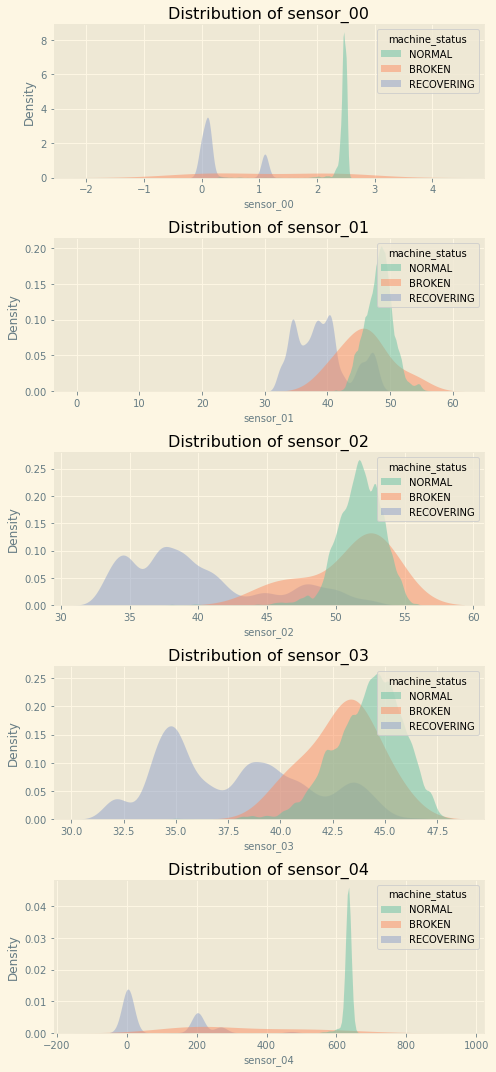

In [56]:
findsens(df.columns[0:5])

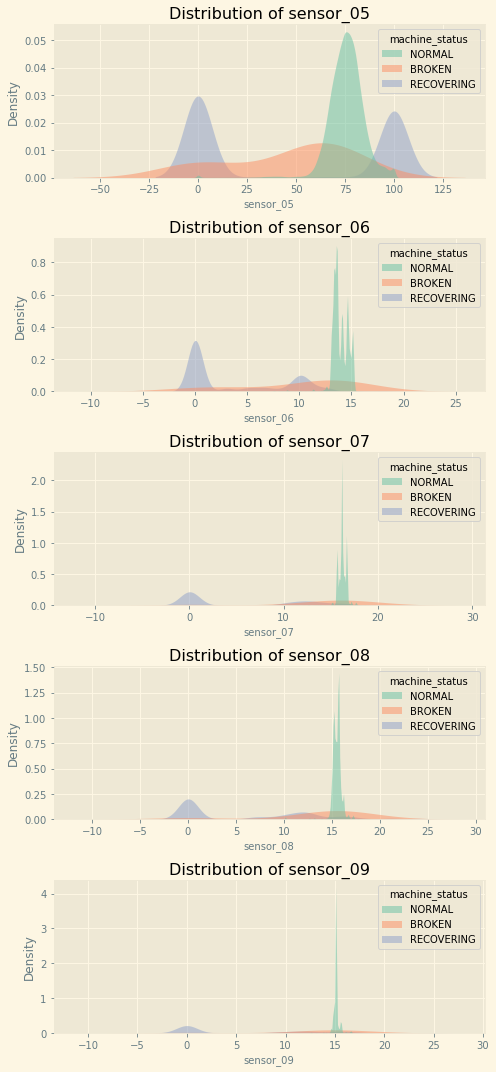

In [57]:
findsens(df.columns[5:10])

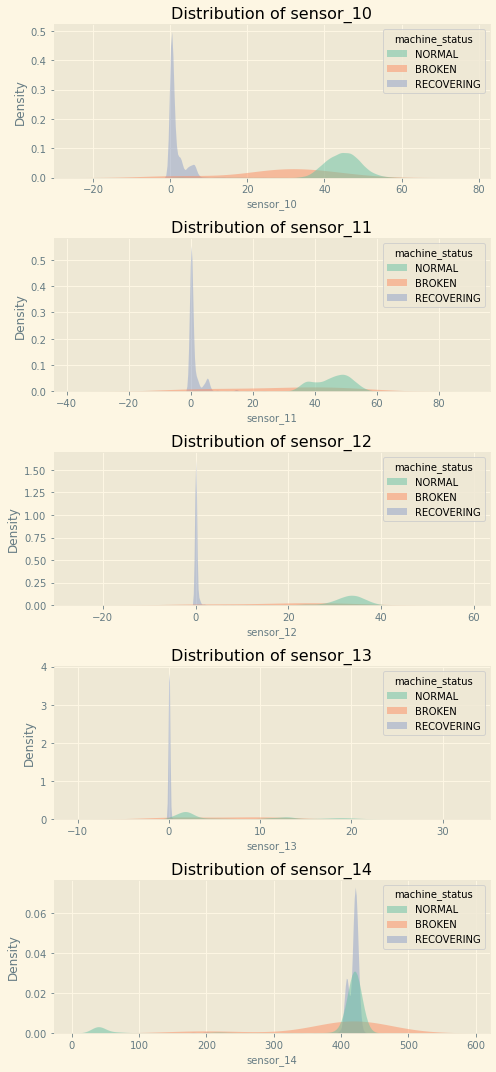

In [58]:
findsens(df.columns[10:15])

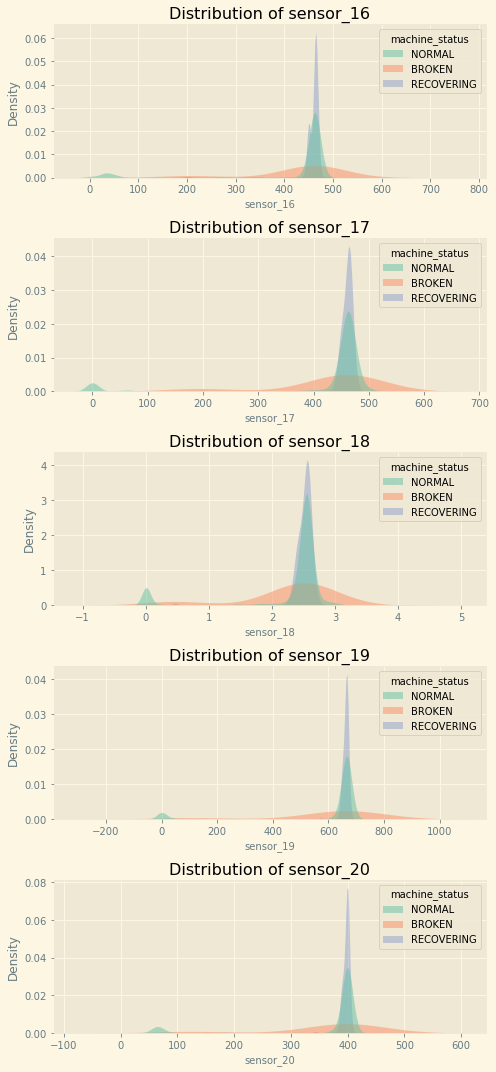

In [70]:
findsens(df.columns[15:20])

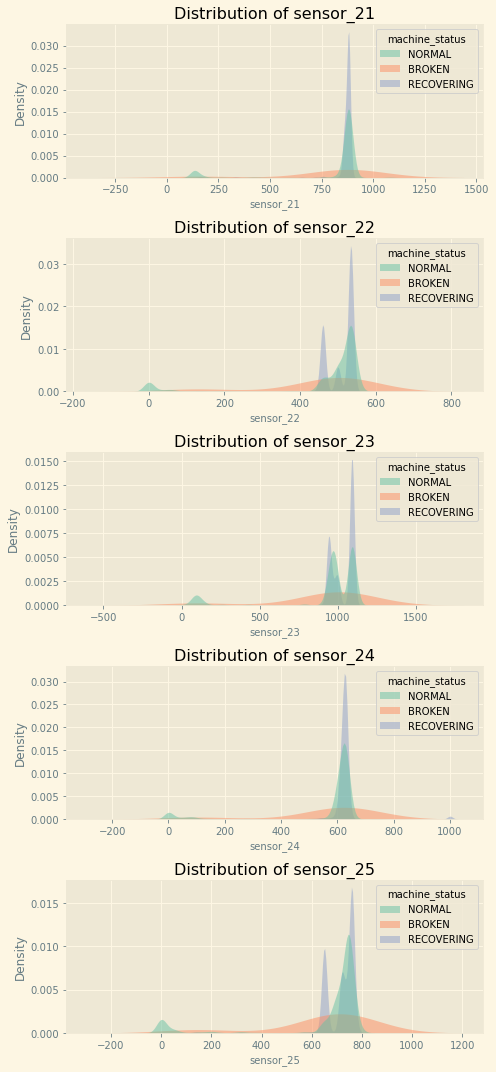

In [60]:
findsens(df.columns[20:25])

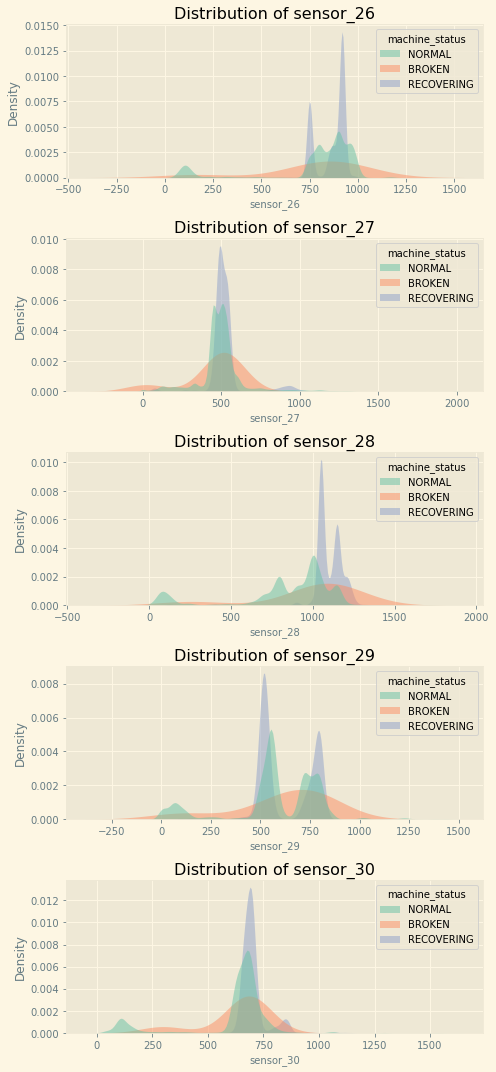

In [61]:
findsens(df.columns[25:30])

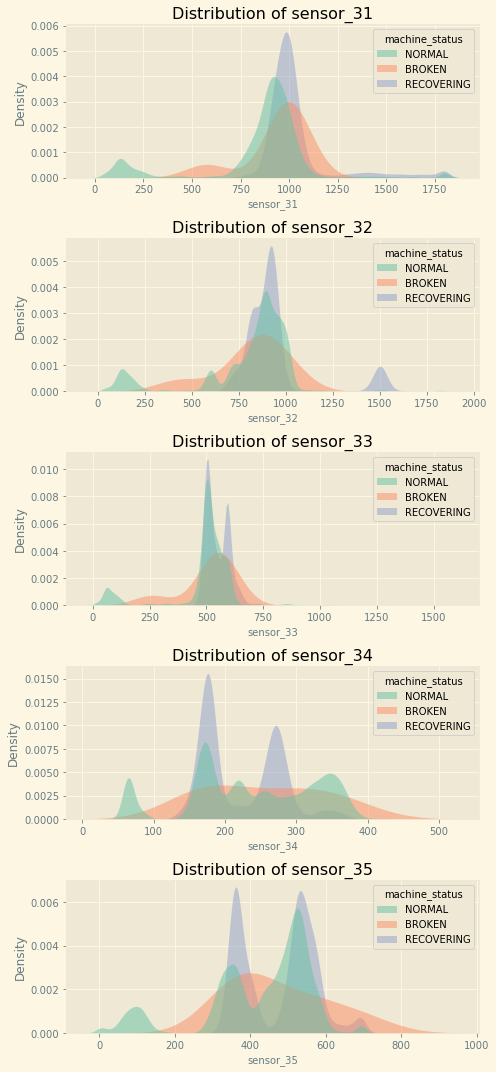

In [62]:
findsens(df.columns[30:35])

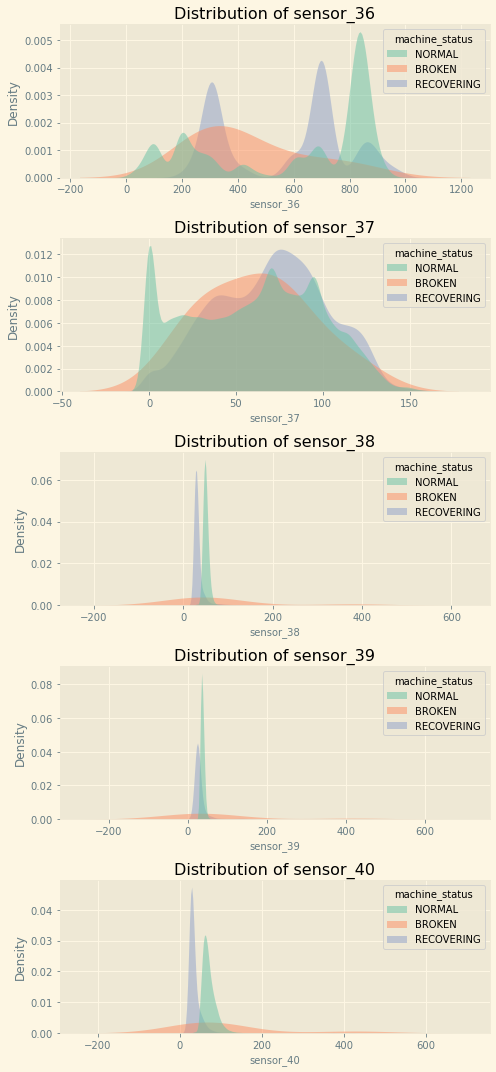

In [63]:
findsens(df.columns[35:40])

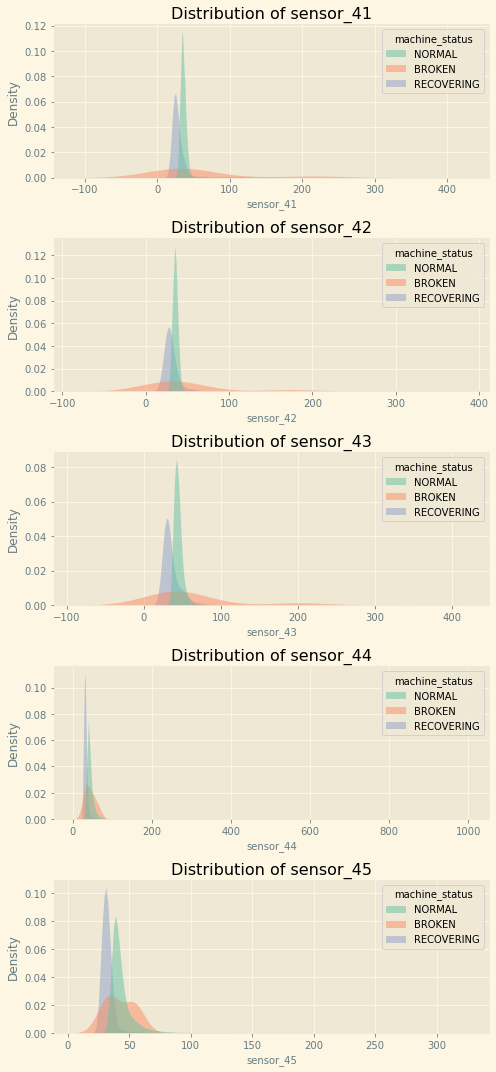

In [71]:
findsens(df.columns[40:45])

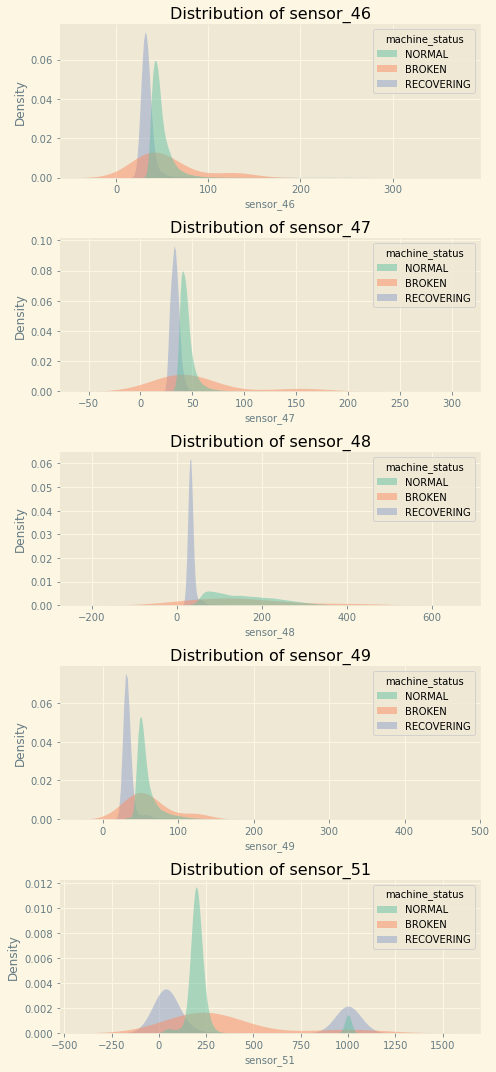

In [72]:
findsens(df.columns[45:50])

In [35]:
# New DF for broken and recovering for plotting
broken = df.loc[df.machine_status== 'BROKEN']
rec = df.loc[df.machine_status == 'RECOVERING']

In [80]:
def status(sensor, data):
    plt.figure(figsize=(30,10))
    plt.plot(rec[sensor], color='lightblue', linestyle='none', marker='o', markersize=10)
    plt.plot(broken[sensor], linestyle='none', marker='o', color='red', markersize=10)
    plt.plot(data[sensor], color='grey')
    plt.title('{} Levels for Pump Failure and Recovery'.format(sensor.capitalize()), fontsize = 20);

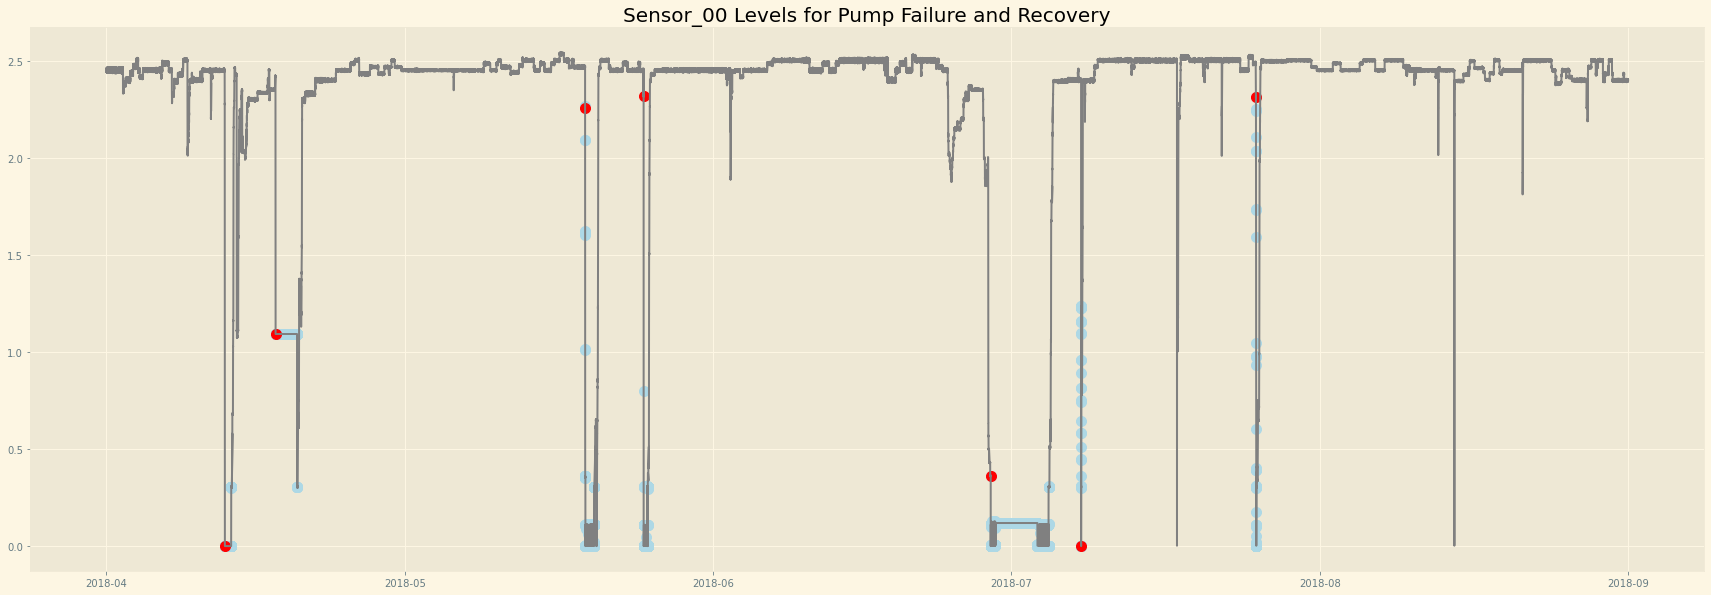

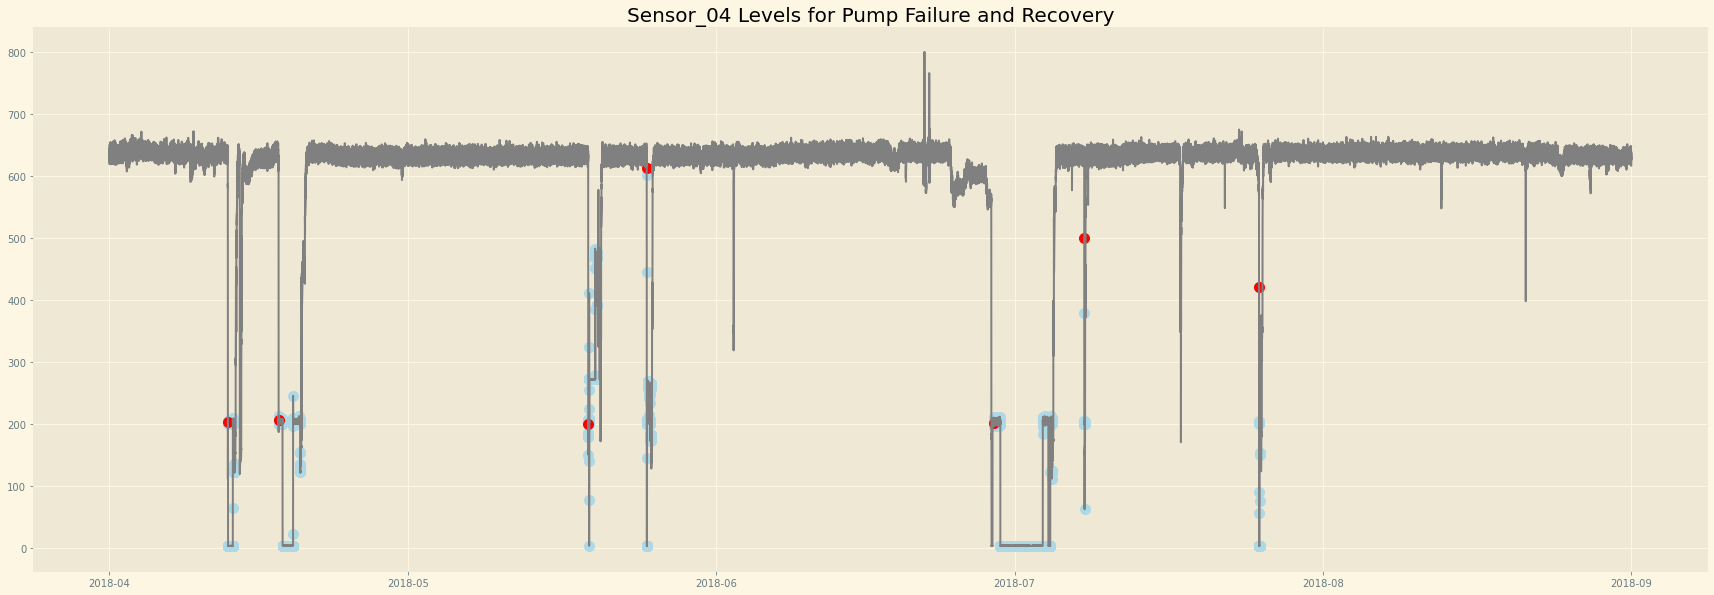

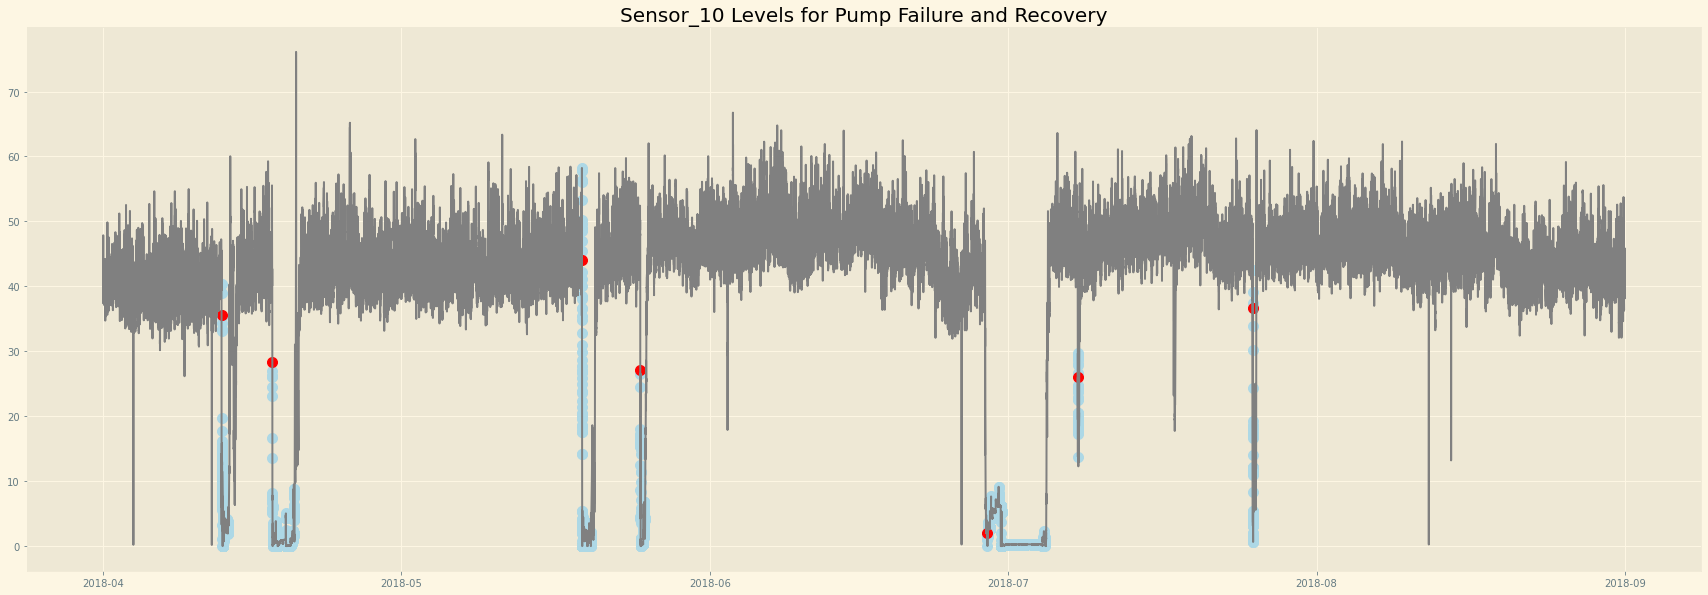

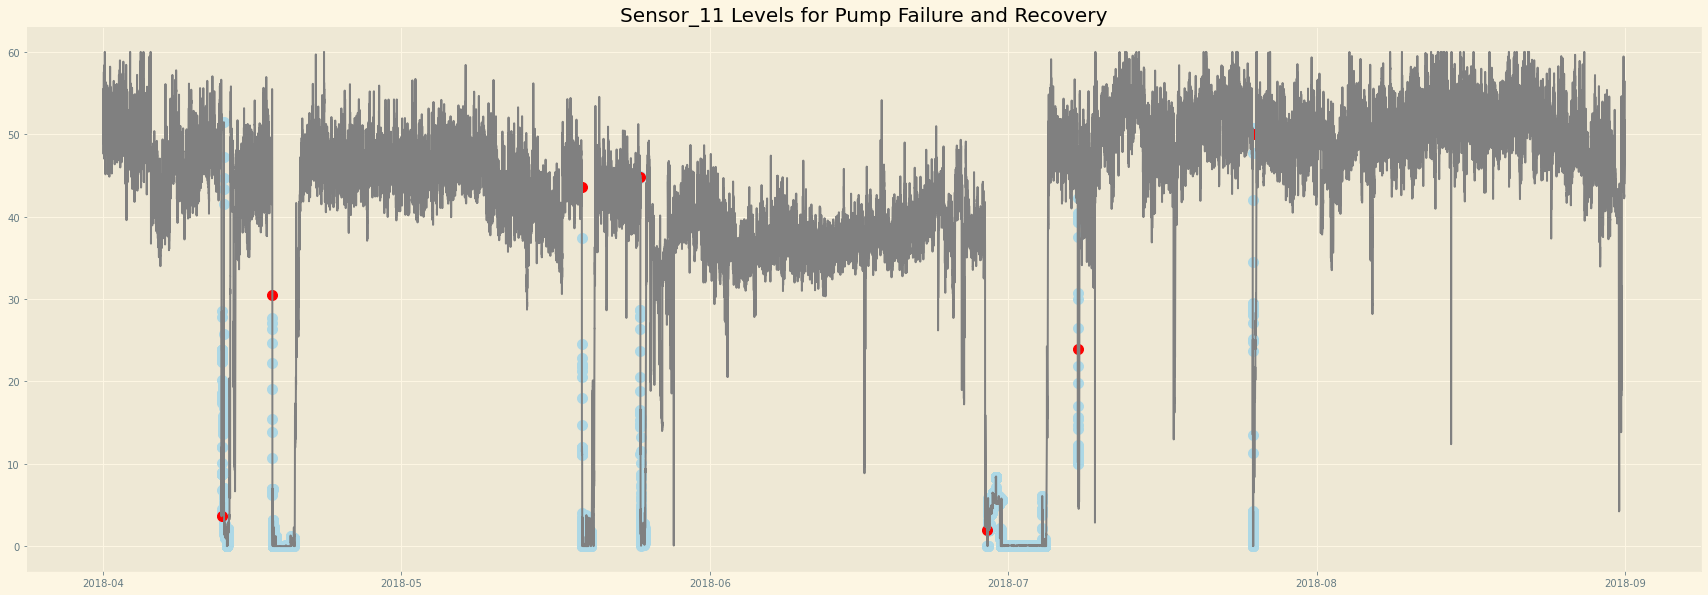

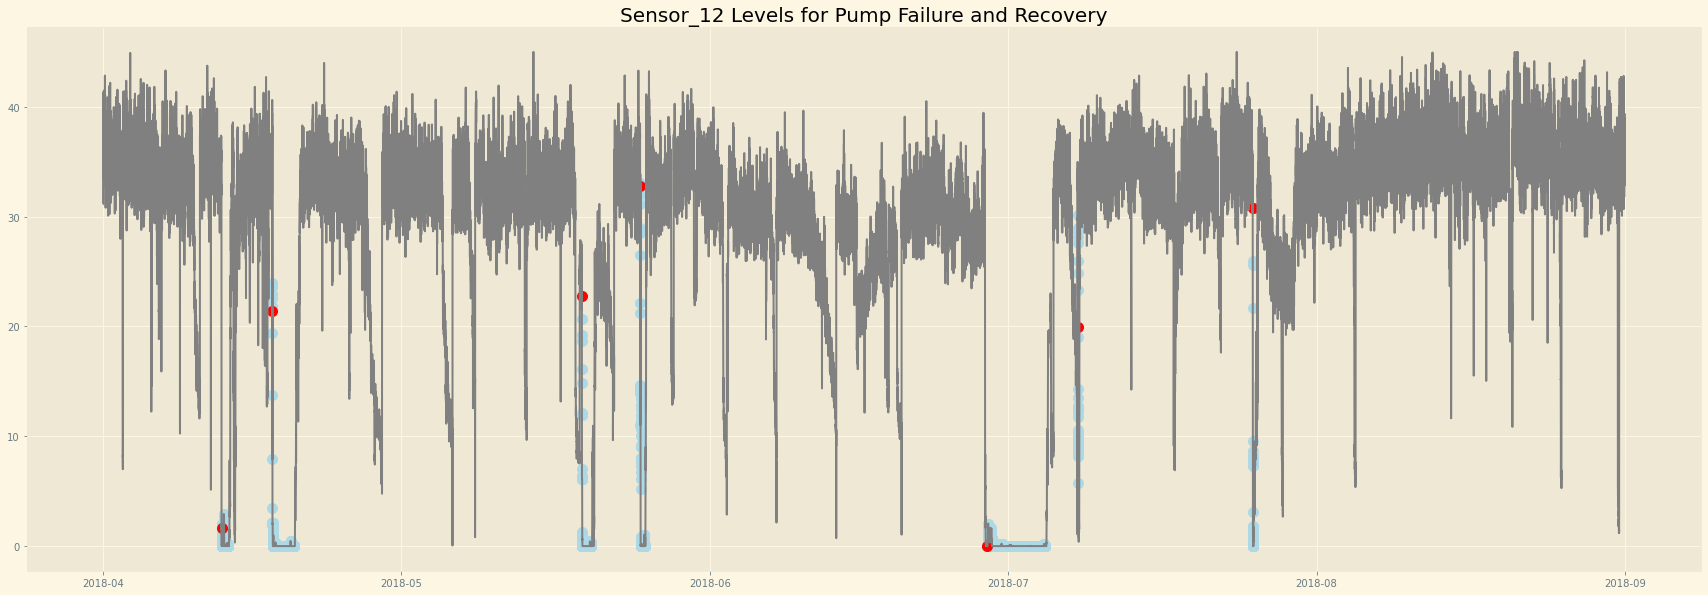

In [81]:
for i in ['sensor_00', 'sensor_04', 'sensor_10', 'sensor_11', 'sensor_12']:
    status(i, df)

In [38]:
def kdeplot(feature):
    plt.figure(figsize=(10, 5))
    plt.title("Kernel Densitiy Estimate for {}".format(feature.capitalize()))
    sns.kdeplot(df.loc[df.machine_status == 'BROKEN'][feature], label= 'broken', shade=True, color = 'pink')
    sns.kdeplot(df.loc[df.machine_status == 'NORMAL'][feature], label = 'normal', shade=True, color='lightblue')
    plt.axvline(df.loc[df.machine_status == 'BROKEN'][feature].mean(), color='crimson', linewidth=0.5)
    plt.axvline(df.loc[df.machine_status == 'NORMAL'][feature].mean(), color='blue', linewidth=0.5)
    plt.legend()

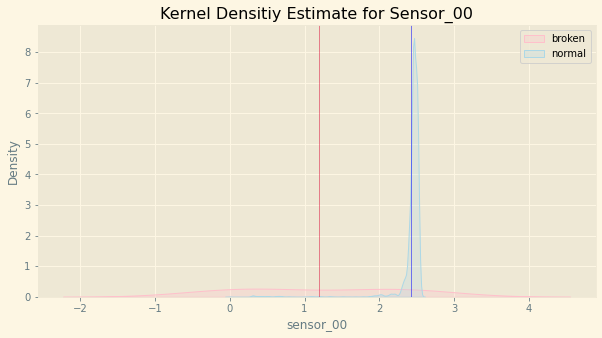

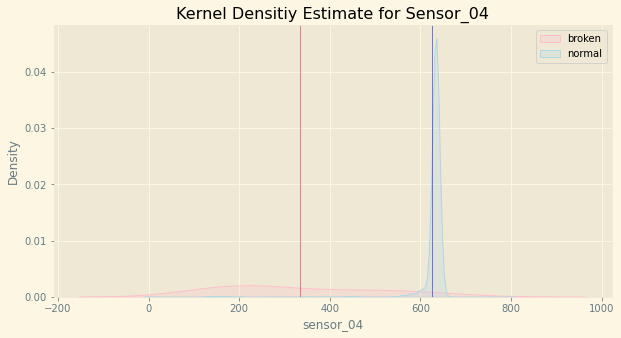

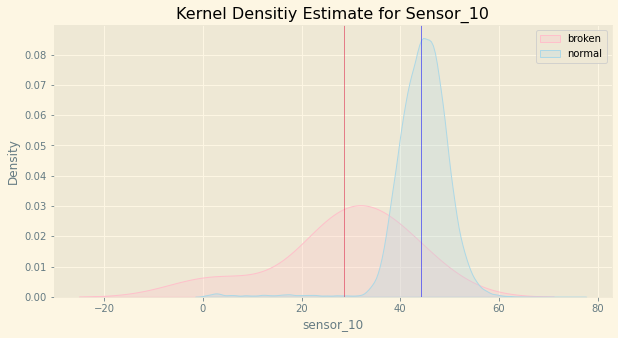

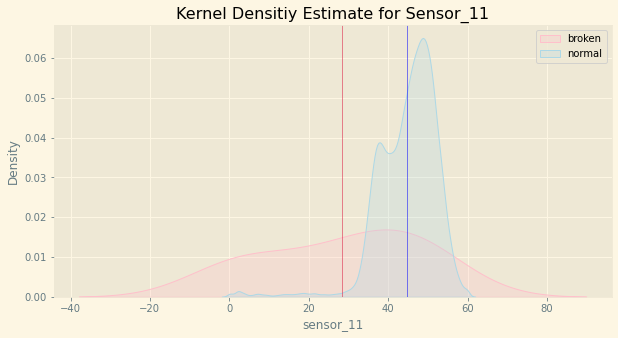

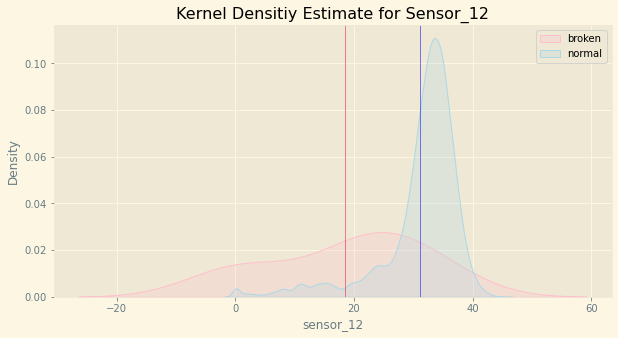

In [76]:
for i in ['sensor_00', 'sensor_04', 'sensor_10', 'sensor_11', 'sensor_12']:
    kdeplot(i)

### First Conclusion only by looking at plots
Many Sensors are very similar to each other and there are no discernable differences betwenn the statuses. Some sensors seem to have a very erratic behaviour on all times without causing failure. This missing of a pattern could prove difficult to find a reliable signal 
The most interesting sensors seem to be: 
- Sensor 0
- Sensor 4
- Sensor 10
- Sensor 11
- Sensor 12

In [77]:
# looking at important sensors
print(df.sensor_00.describe())
print(df.sensor_04.describe())
print(df.sensor_10.describe())
print(df.sensor_11.describe())
print(df.sensor_12.describe())

count    220320.000000
mean          2.281158
std           0.585413
min           0.000000
25%           2.419155
50%           2.455556
75%           2.499826
max           2.549016
Name: sensor_00, dtype: float64
count    220320.000000
mean        590.664106
std         144.042134
min           2.798032
25%         626.620400
50%         632.638916
75%         637.615723
max         800.000000
Name: sensor_04, dtype: float64
count    220320.000000
mean         41.469733
std          12.094658
min           0.000000
25%          40.704892
50%          44.291375
75%          47.464360
max          76.106860
Name: sensor_10, dtype: float64
count    220320.000000
mean         41.917808
std          13.057506
min           0.000000
25%          38.856392
50%          45.363450
75%          49.656238
max          60.000000
Name: sensor_11, dtype: float64
count    220320.000000
mean         29.136158
std          10.114627
min           0.000000
25%          28.684967
50%          32.51575

In [78]:
# Will anomalies be seen when aggregating data
sensors = df.resample('10min').agg({'sensor_00':'mean', 'sensor_04': 'mean', 
                          'sensor_10': 'mean', 'sensor_11': 'mean', 'sensor_12': 'mean'})

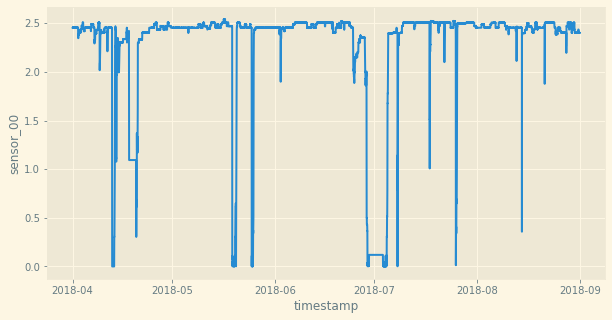

In [42]:
plt.figure(figsize=(10,5))
sns.lineplot(data=sensors, x=sensors.index, y='sensor_00');

## Transformations
As I want to try to predict "broken" before it happens, "recovering"  will be eliminated from the dataframe, as only normal and broken are interesting for the forecasting. Predicting recovering could also be seen as leakage, as you would not know this with real-time sensor data. 

In [43]:
# New Dataframe
df_new = df.loc[(df.machine_status == 'NORMAL') | (df.machine_status == 'BROKEN') ]

In [44]:
# Check new Dataframe
df_new.machine_status.value_counts()

NORMAL    205836
BROKEN         7
Name: machine_status, dtype: int64

In [45]:
# Get dummies for machine_status and rename column
df_new = pd.get_dummies(df_new, columns=['machine_status'], drop_first = True)

In [46]:
# check new dataframe
df_new.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status_NORMAL
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,1
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,1
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,1
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,1
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,1


In [47]:
# turn it around, so anomaly is 1
df_new.machine_status_NORMAL = df_new.machine_status_NORMAL.map({1:0, 0:1})

In [48]:
df_new = df_new.rename(columns={'machine_status_NORMAL':'broken'})

In [49]:
df_new.broken.value_counts()

0    205836
1         7
Name: broken, dtype: int64

In [50]:
df_new.shape, df.shape

((205843, 51), (220320, 51))

## Save Dataset

In [51]:
# df_new.to_csv('wp_clean.csv', sep=',', encoding='utf-8', index=True)